# Small Information About Dataset

### Problem Statement : To predict the behaviour to retain customers . I can analyse all the relavant customer data and develop focused customer retention programs.

#### Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#### the data set includes information about:

#### Customers who left within the last month – the column is called Churn
#### Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
#### Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
#### Demographic info about customers – gender, age range, and if they have partners and dependents

#### CUSTOMER CHURN : Customer churn, also known as customer attrition,is when a customer chooses to stop using products or services of a company. But with each customer who churns, there are usually early indicators or metrics that can have been uncovered with churn analysis.

In [98]:
# Customer ID
# Gender : whether the customer is a male or female
# Senior Citizen : whether the customer is a senior citizen or not(1,0)
# Partner : wheteher the customer has a partner or not 
# Dependents : whether the customer has dependents or not
# tenure : number of months the customer has stayed with company
# Phone Service : whether the customer has a phone service or not
# MultipleLines : whether the customer has multiple lines or not (yes , no , no phone lines)
# Internet Service : Customer's internet service provider(DSL , Fiber optic , No)
# OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
# Online backup : Whether the customer has online backup or not (Yes, No, No internet service)
# DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
# TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
# StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
# StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
# Contract : The contract term of the customer (Month-to-month, One year, Two year)
# PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
# PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# MonthlyCharges : The amount charged to the customer monthly
# TotalCharges : The total amount charged to the customer
# Churn : whether the customer churnedd or not (yes or no)

In [99]:
import pandas as pd
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
df.shape

(7043, 21)

In [101]:
df.size

147903

In [102]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [104]:
# As the churn is not dependent on customr id so we drop it
df = df.drop(['customerID'] , axis = 1)
df.shape

(7043, 20)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [106]:
# In chi2
# if porbability value is less than 5% then we reject the null hypothesis
# ho= there is no relation between given feature with dependent variable
# ha= there is relation between given feature with dependent variable

In [107]:
for cols in df.columns:
    if df[cols].dtype == 'object':
        from scipy.stats import chi2_contingency
        chi_df = pd.crosstab(df[cols] , df['Churn'])
        a , p_value , b ,c = chi2_contingency(chi_df)
        if p_value <0.05:
            print(f'{cols} has p_value of {p_value}')

Partner has p_value of 2.1399113440759935e-36
Dependents has p_value of 4.9249216612154196e-43
MultipleLines has p_value of 0.0034643829548773
InternetService has p_value of 9.571788222840544e-160
OnlineSecurity has p_value of 2.661149635176552e-185
OnlineBackup has p_value of 2.0797592160864276e-131
DeviceProtection has p_value of 5.505219496457244e-122
TechSupport has p_value of 1.4430840279998987e-180
StreamingTV has p_value of 5.528994485739183e-82
StreamingMovies has p_value of 2.667756755723681e-82
Contract has p_value of 5.863038300673391e-258
PaperlessBilling has p_value of 4.073354668665985e-58
PaymentMethod has p_value of 3.6823546520097993e-140
Churn has p_value of 0.0


In [108]:
# all the values is smaller than 0.05 so we reject the null hypothesis

In [109]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [110]:
#Removing tenure equal to 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [111]:
df = df.drop(labels = df[df['tenure'] == 0].index , axis = 0)
df.shape

(7032, 20)

## Visualization

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

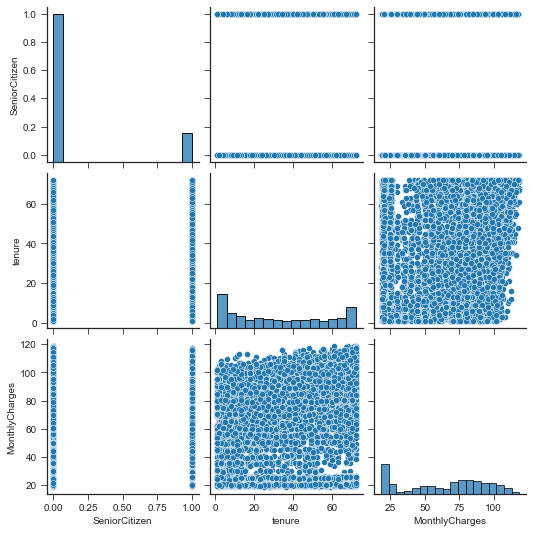

In [113]:
sns.pairplot(df)

<AxesSubplot:xlabel='count', ylabel='Dependents'>

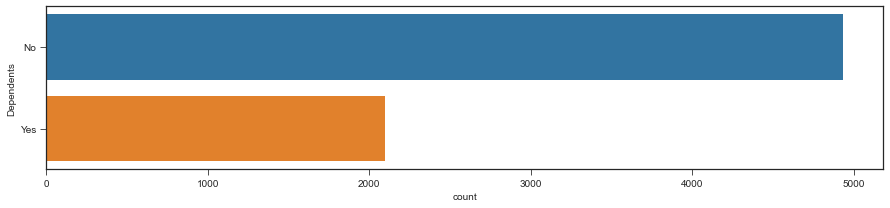

In [114]:
fig = plt.figure(figsize = (15,3))
plt.style.use('seaborn-ticks')
sns.countplot(y  = 'Dependents',data = df)

In [115]:
df.select_dtypes(include = ['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Partner'>

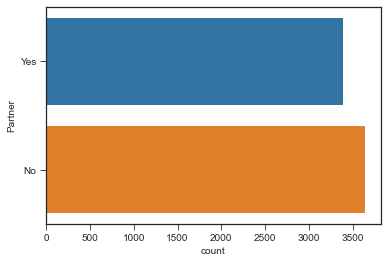

In [116]:
sns.countplot(y  = 'Partner',data = df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

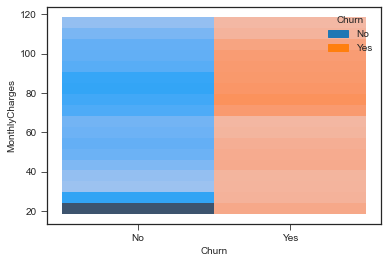

In [117]:
sns.histplot(x = df.Churn , y = df.MonthlyCharges , hue = df.Churn)

In [118]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

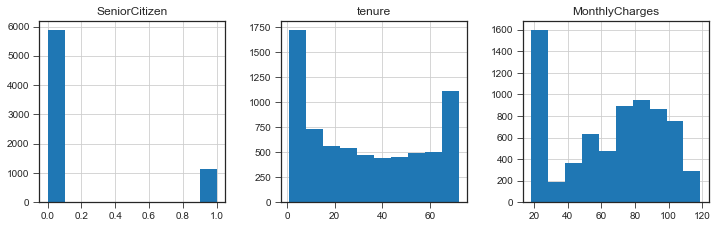

In [119]:
df.hist(figsize = (12,12) , layout=(3,3))
plt.show()

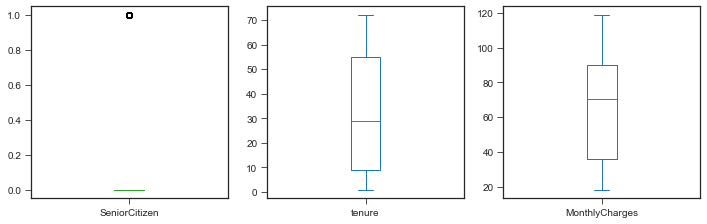

In [120]:
df.plot(kind = 'box',figsize = (12,12) , layout = (3,3) , sharex = False , subplots = True);

### hence there is no outliers present in dataset so now we will convert categorical data into numerical data

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[df.select_dtypes(include = ['object']).columns] = df[df.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [122]:
df.select_dtypes(include = ['object']).columns
# hence there is no categorical variable present in my dataset

Index([], dtype='object')

In [123]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2504,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1465,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,156,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1399,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,924,1


In [124]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,-0.005087,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.036556,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.061571,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,-0.005469,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.155539,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.082728,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.115215,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.055138,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.044003,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.092141,-0.195290


In [125]:
# I cant understand the correlation with my dependent variable so 
# I will use easy method
for cols in df.columns:
    if df[cols].dtype!= 'object':
        corr = df[cols].corr(df['Churn'])
        print(f'{cols} has correlation with Churn as {corr}')

gender has correlation with Churn as -0.008544643224946453
SeniorCitizen has correlation with Churn as 0.15054105341568022
Partner has correlation with Churn as -0.14998192562005935
Dependents has correlation with Churn as -0.16312843938822022
tenure has correlation with Churn as -0.3540493589532514
PhoneService has correlation with Churn as 0.011691398865421547
MultipleLines has correlation with Churn as 0.038043274356214206
InternetService has correlation with Churn as -0.04709716459089944
OnlineSecurity has correlation with Churn as -0.2890501761175914
OnlineBackup has correlation with Churn as -0.19529020856666396
DeviceProtection has correlation with Churn as -0.17788319529016064
TechSupport has correlation with Churn as -0.2822324866026612
StreamingTV has correlation with Churn as -0.0363027215124606
StreamingMovies has correlation with Churn as -0.03880174840533754
Contract has correlation with Churn as -0.3961495329936538
PaperlessBilling has correlation with Churn as 0.1914543

## Model Building
#### some rules
##### Accuracy : higher the accuracy better the model
##### TPR(recalll) : higher the recall better the model
##### FPR lower the fpr better the model
##### Precision : higher the precision better the model
##### F1 : Higher the F! better the model

In [126]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [127]:
1869/(5163+1869)  # as we can see this data is huge imbalanced

0.26578498293515357

In [128]:
# we need to balanced this dataset
from sklearn.model_selection import train_test_split
stratified_x = df.iloc[::,:-1]
stratified_y = df.iloc[::,-1]
train_X , test_X , train_y , test_y = train_test_split(stratified_x , stratified_y , stratify=stratified_y , random_state=0 , test_size = 0.2)

In [129]:
train_y.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [130]:
test_y.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [131]:
374/1033 #test_y ratio

0.36205227492739595

In [132]:
1495/4130 # train-y ratio

0.3619854721549637

So our data is balanced now

In [133]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

In [134]:
print('Mean',train_X['tenure'].mean())
print('std',train_X['tenure'].std())

Mean 32.36977777777778
std 24.49887818657871


In [135]:
print('mean',train_X['MonthlyCharges'].mean())
print('std',train_X['MonthlyCharges'].std())

mean 64.91769777777789
std 30.01338317441682


In [136]:
print('mean',train_X['TotalCharges'].mean())
print('std',train_X['TotalCharges'].std())

mean 3257.2028444444445
std 1886.4399512895216


In [137]:
from sklearn.preprocessing import StandardScaler  # mean = 0 , std = 1
scaler = StandardScaler()
train_X[num_cols] = scaler.fit_transform(train_X[num_cols])
test_X[num_cols] = scaler.fit_transform(test_X[num_cols])

In [138]:
train_X['MonthlyCharges'].std()  # it means standard scaler has been done succefully

1.0000889007424973

## Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

array([[938,  95],
       [172, 202]], dtype=int64)

In [140]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8102345415778252
precision: 0.6801346801346801
roc_curve: 0.7240709009116275
f1_score: 0.6020864381520119


In [141]:
roc_auc_score(test_y , pred_y)

0.7240709009116275

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.68      0.54      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



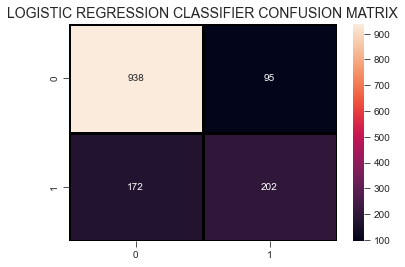

In [142]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [143]:
# CROSS VALIDATIN OF LOGITIC REGRESSION
lr_grid = {'solver' :['newton-cg','lbfgs','liblinear','sag','saga'],
           'penalty':['elasticnet','l1','l2']}
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr , param_grid = lr_grid)
grid_lr.fit(train_X , train_y)
                      

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErro

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [144]:
grid_lr.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [145]:
lr = LogisticRegression(penalty = 'l1',solver='saga')
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

array([[940,  93],
       [172, 202]], dtype=int64)

In [146]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8116560056858564
precision: 0.6847457627118644
roc_curve: 0.7250389551226633
f1_score: 0.6038863976083707


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

NameError: name 'test_y' is not defined

## KNEAREST NEIGHBOURS

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[888, 145],
       [183, 191]], dtype=int64)

In [149]:
accuracy_score(test_y , pred_y)

0.7668798862828714

In [150]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7668798862828714
precision: 0.5684523809523809
roc_curve: 0.685163663282791
f1_score: 0.5380281690140845


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



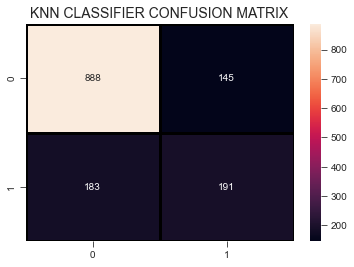

In [151]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [152]:
## CROSS VALIDATION OF KNN
# Cross Validation
parameter_dict={'n_neighbors':[1,11,21,31,41,51,75,101]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(train_X , train_y)
grid_df.best_params_

{'n_neighbors': 75}

In [153]:
knn=KNeighborsClassifier(n_neighbors=75,weights='distance')
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
a = confusion_matrix(test_y , pred_y)
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('Confusion :',a)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

Confusion : [[912 121]
 [188 186]]
accuracy : 0.7803837953091685
precision: 0.6058631921824105
roc_curve: 0.6900958218366111
f1_score: 0.5462555066079295


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



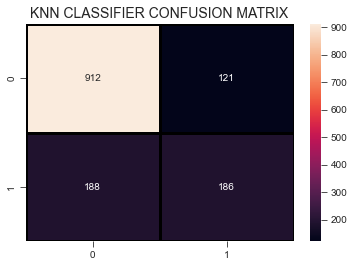

In [154]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## DECISION TREE CLASSIFIER

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[838, 195],
       [195, 179]], dtype=int64)

In [156]:
accuracy_score(test_y , pred_y)

0.7228144989339019

In [157]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7228144989339019
precision: 0.4786096256684492
roc_curve: 0.6449195272582323
f1_score: 0.4786096256684492


In [158]:
# CROSS VALIDATION OF DECISION TREE CLASSIFIER
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [159]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [160]:
dt=DecisionTreeClassifier(criterion='gini' , max_depth=4 , min_samples_split=2)
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[954,  79],
       [232, 142]], dtype=int64)

In [161]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7789623312011372
precision: 0.6425339366515838
roc_curve: 0.6516014308565986
f1_score: 0.4773109243697479


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1033
           1       0.64      0.38      0.48       374

    accuracy                           0.78      1407
   macro avg       0.72      0.65      0.67      1407
weighted avg       0.76      0.78      0.76      1407



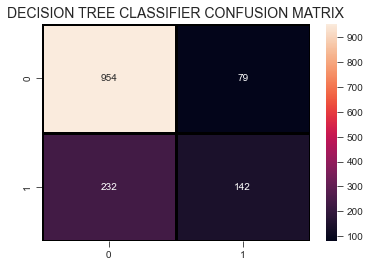

In [162]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## BAGGING CLASSIFIEER

In [163]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)
bg.fit(train_X , train_y)
y_pred_bagg=bg.predict(test_X)
confusion_matrix(test_y,y_pred_bagg)

array([[934,  99],
       [202, 172]], dtype=int64)

In [164]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7789623312011372
precision: 0.6425339366515838
roc_curve: 0.6516014308565986
f1_score: 0.4773109243697479


In [165]:
#CROSS VALIDATION OF BAGING CLASSIFIER
from sklearn.model_selection import GridSearchCV
param_grid_bagging = {'n_estimators':list(range(1,100,10))}
grid = GridSearchCV(bg , param_grid=param_grid_bagging)
grid.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This prob

GridSearchCV(estimator=BaggingClassifier(n_estimators=100, oob_score=True,
                                         random_state=42),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [166]:
grid.best_params_

{'n_estimators': 91}

In [167]:
bg = BaggingClassifier(n_estimators=91 , bootstrap=True , oob_score=True)
bg.fit(train_X , train_y)
pred_y = bg.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[933, 100],
       [197, 177]], dtype=int64)

In [168]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7889125799573561
precision: 0.6389891696750902
roc_curve: 0.6882283054909898
f1_score: 0.543778801843318


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



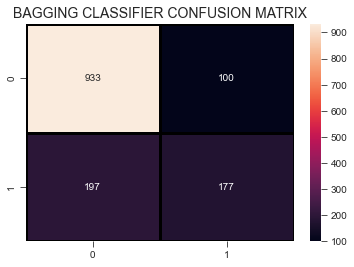

In [169]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## RANDOM FOREST CLASSIFIER

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_X , train_y)
pred_y = rf.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[950,  83],
       [195, 179]], dtype=int64)

In [171]:
accuracy_score(test_y , pred_y)

0.8024164889836531

In [172]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8024164889836531
precision: 0.683206106870229
roc_curve: 0.6991305630762381
f1_score: 0.5628930817610063


In [ ]:
# CROSS VALIDATION OF RANDOM FOREST CLASSIFIER
parameter_dict={'n_estimators':list(range(1,100,10)),
    'criterion':['gini','entropy'],
    'max_depth':list(range(1,25,5)),
    'min_samples_split':list(range(1,10,2)),
    'min_samples_leaf':[1,2,3,4,5]
    }
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(rf,param_grid=parameter_dict)
rf_grid.fit(train_X , train_y)
rf_grid.best_params_

## SUPPORT VECTOR CLASSIFIER

In [173]:
from sklearn.svm import SVC
svm= SVC(degree=4)
svm.fit(train_X , train_y)
y_pred_svm=svm.predict(test_X)
print(confusion_matrix(test_y ,y_pred_svm))
w = accuracy_score(test_y ,y_pred_svm)
x = precision_score(test_y , y_pred_svm)
y = roc_auc_score(test_y , y_pred_svm)
z = f1_score(test_y ,y_pred_svm)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

[[959  74]
 [215 159]]
accuracy : 0.7945984363894811
precision: 0.6824034334763949
roc_curve: 0.6767488391114608
f1_score: 0.5238879736408567


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



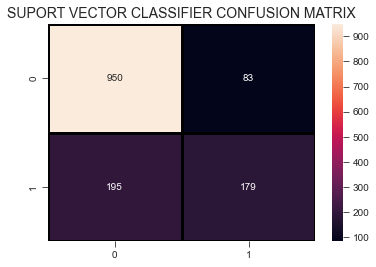

In [174]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## VOTING CLASSIFIER

In [175]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([('knn',knn),('dt',dt),('rf',rf),('bg',bg)],voting='hard',n_jobs=5)
voting_clf.fit(train_X , train_y)
y_pred_voting_clf=voting_clf.predict(test_X)
confusion_matrix(test_y,y_pred_voting_clf)

array([[961,  72],
       [215, 159]], dtype=int64)

In [176]:
w = accuracy_score(test_y ,y_pred_voting_clf)
x = precision_score(test_y , y_pred_voting_clf)
y = roc_auc_score(test_y , y_pred_voting_clf)
z = f1_score(test_y ,y_pred_voting_clf)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7960199004975125
precision: 0.6883116883116883
roc_curve: 0.6777168933224966
f1_score: 0.5256198347107437


## ADABOOSTING CLASSIFIER

In [177]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(train_X , train_y)
pred_y = ada.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[934,  99],
       [177, 197]], dtype=int64)

In [178]:
w = accuracy_score(test_y ,pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y ,pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8038379530916845
precision: 0.6655405405405406
roc_curve: 0.7154503005109464
f1_score: 0.5880597014925374


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.67      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



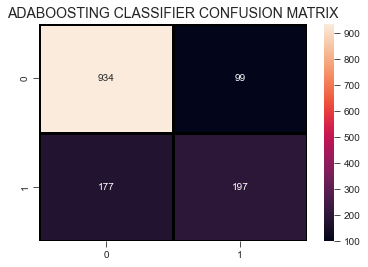

In [179]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("ADABOOSTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## XGBOOST CLASSIFIER

In [180]:
from xgboost import XGBClassifier

In [181]:
xgb = XGBClassifier()
xgb.fit(train_X , train_y)
pred_y = xgb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[928, 105],
       [193, 181]], dtype=int64)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



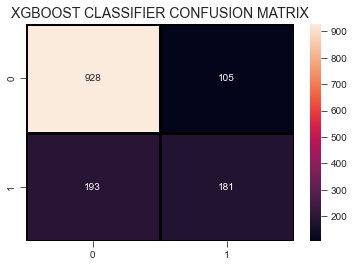

In [182]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## CONCLUSION : Cross Validation of Logistic regression shows Highest Accuracy and Lowest F1score , so we should go with LOGISTIC REGRESSION